In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from datetime import datetime,timedelta
from countryinfo import CountryInfo # we can get the information anout country from this (population, coordinates, etc)


import sklearn.metrics as sklm
from scipy.optimize import curve_fit
from scipy.optimize import fsolve

In [318]:
# http://www.pisces-conservation.com/growthhelp/index.html?the_gompertz_growth_curve.htm
#http://hplgit.github.io/prog4comp/doc/pub/._p4c-solarized-Python020.html



In [2]:
# getting data from John Hopkins observatory is providing a github repository with all recent data: 
# https://github.com/CSSEGISandData/COVID-19.git

In [3]:
giturl_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths_data = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_data = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'


In [4]:
covid_id='Confirmed'

In [5]:
if covid_id=='Confirmed':
    curl = giturl_confirmed
elif covid_id =='Deaths':
    curl = giturl_deaths
elif covid_id =='Recovered':
    curl = giturl_recovered

In [6]:
corona_cases_df = pd.read_csv(curl)  #   use first four columns as multiindex

In [7]:
print(corona_cases_df.shape)
print(corona_cases_df.columns.values)


(245, 68)
['Province/State' 'Country/Region' 'Lat' 'Long' '1/22/20' '1/23/20'
 '1/24/20' '1/25/20' '1/26/20' '1/27/20' '1/28/20' '1/29/20' '1/30/20'
 '1/31/20' '2/1/20' '2/2/20' '2/3/20' '2/4/20' '2/5/20' '2/6/20' '2/7/20'
 '2/8/20' '2/9/20' '2/10/20' '2/11/20' '2/12/20' '2/13/20' '2/14/20'
 '2/15/20' '2/16/20' '2/17/20' '2/18/20' '2/19/20' '2/20/20' '2/21/20'
 '2/22/20' '2/23/20' '2/24/20' '2/25/20' '2/26/20' '2/27/20' '2/28/20'
 '2/29/20' '3/1/20' '3/2/20' '3/3/20' '3/4/20' '3/5/20' '3/6/20' '3/7/20'
 '3/8/20' '3/9/20' '3/10/20' '3/11/20' '3/12/20' '3/13/20' '3/14/20'
 '3/15/20' '3/16/20' '3/17/20' '3/18/20' '3/19/20' '3/20/20' '3/21/20'
 '3/22/20' '3/23/20' '3/24/20' '3/25/20']


In [8]:
def countries_list():
    # note returning countries list in confirmes cases only
    curl = confirmed_data
    corona_cases_df = pd.read_csv(curl, index_col=[0,1,2,3])
    country_list = np.unique(corona_cases_df['Country/Region'].values)
    return(country_list)

In [9]:
curl = giturl_confirmed
corona_cases_df = pd.read_csv(curl)

In [10]:
corona_cases_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20'],
      dtype='object')

In [11]:
corona_cases_df = pd.read_csv(curl, index_col=[0,1,2,3])  #   use first four columns as multiindex
#corona_cases_df.columns.values[4:]

In [12]:
#countries = ['China', 'Canada', 'India']
datesformat = [datetime.strptime(da, '%m/%d/%y') for da in corona_cases_df.columns.values[4:]]
daterange = pd.DatetimeIndex(datesformat)

In [72]:
print(daterange)

DatetimeIndex(['2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
      

In [13]:
country_official_list = (corona_cases_df.index.get_level_values('Country/Region').values)
print(country_official_list)

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Australia'
 'Australia' 'Australia' 'Australia' 'Australia' 'Australia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia'
 'Cameroon' 'Canada' 'Canada' 'Canada' 'Canada' 'Canada' 'Canada' 'Canada'
 'Canada' 'Canada' 'Canada' 'Canada' 'Central African Republic' 'Chad'
 'Chile' 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China'
 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China'
 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China'
 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'Colombia'
 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Diamond Princess' 'Cuba' 'Cyprus' 'Czechia' 'Denmark'
 'Denmark' 'Denmark' 'Dj

In [14]:
wanted_countries = ['Canada', 'India','China', 'US']

country_list = (corona_cases_df.index.get_level_values('Country/Region').values)
countries_list = [np.unique(np.array([s for s in country_list if cou in s])) for cou in wanted_countries]
countries_list = np.array(countries_list).flatten()
print((countries_list))

['Canada' 'India' 'China' 'US']


In [15]:
country_list = (corona_cases_df.index.get_level_values('Country/Region').values)


In [16]:
'''for cou in wanted_countries:
    for s in country_list:
        if cou in s:
            print(cou)'''

'for cou in wanted_countries:\n    for s in country_list:\n        if cou in s:\n            print(cou)'

In [17]:
countries_list[0]

'Canada'

In [37]:
# getting all for canada
corona_cases_df.loc[pd.IndexSlice[:, 'China'], :]

,,,,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
Province/State,Country/Region,Lat,Long,,,,,,,,,,,,,,,,,,,,,
Anhui,China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,...,990,990,990,990,990,990,990,990,990,990
Beijing,China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,...,452,456,469,480,491,504,522,537,558,561
Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,132,147,182,211,...,576,576,576,576,576,576,577,578,578,578
Fujian,China,26.0789,117.9874,1,5,10,18,35,59,80,84,101,120,...,296,296,296,296,299,303,313,313,318,322
Gansu,China,37.8099,101.0583,0,2,2,4,7,14,19,24,26,29,...,133,133,133,134,134,134,136,136,136,136
Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,207,277,354,436,...,1361,1364,1370,1378,1395,1400,1413,1415,1428,1433
Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,51,58,78,87,...,252,253,253,253,254,254,254,254,254,254
Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,9,9,12,29,...,146,147,146,146,146,146,146,146,146,146
Hainan,China,19.1959,109.7453,4,5,8,19,22,33,40,43,46,52,...,168,168,168,168,168,168,168,168,168,168


In [19]:
print('                                              INDEX SLICE (EXAMPLE)')
midx = pd.MultiIndex.from_product([['A0','A1'], ['B0','B1','B2','B3']])
columns = ['foo', 'bar']
dfmi = pd.DataFrame(np.arange(16).reshape((len(midx), len(columns))),
                        index=midx, columns=columns)
print('raw data')
print(dfmi)

idx = pd.IndexSlice
print('')
print('Example of Index slice')
print(dfmi.loc[idx[:, 'B0':'B1'], :])

                                              INDEX SLICE (EXAMPLE)
raw data
       foo  bar
A0 B0    0    1
   B1    2    3
   B2    4    5
   B3    6    7
A1 B0    8    9
   B1   10   11
   B2   12   13
   B3   14   15

Example of Index slice
       foo  bar
A0 B0    0    1
   B1    2    3
A1 B0    8    9
   B1   10   11


In [20]:
cases_percountry = {}
df_dict = {}
for country in countries_list:
    
    # CHECK THE INDEX SLICE EXAMPLE ABOVE. WE ARE DOIGN THIS TO GET ALL THE DATA FOR THE COUNTRY WE ARE LOOKING FOR
    # we are doing sum for the total number of cases in a country, eg: in canada we have 12 rows for wach province
    # but we want to see for whole canada
    cou = corona_cases_df.loc[pd.IndexSlice[:, country], :].sum()
    
    # getting rid of the record which has zero cases
    cases_percountry[country] = cou[cou > 0]
    datesformat = [datetime.strptime(da, '%m/%d/%y') for da in cases_percountry[country].index]
    df_dict[country] = pd.DataFrame(cases_percountry[country], columns=['Cases'], index=datesformat)
    df_dict[country]['DayCount'] = np.arange(1,cases_percountry[country].shape[0]+1)
#df_dict has country -> date, cases: # cases that day, DayCount

In [21]:
# there is asome manual fix of data followed online.. some numbers were not correct
# copied from the link mentioned above

confirmed_fixes_dict = {'Italy|2020-03-12': 15113,
                        'Spain|2020-03-12': 3146,
                        'France|2020-03-12': 2876,
                        'United Kingdom|2020-03-12': 590,
                        'Germany|2020-03-12': 2745,
                        'Argentina|2020-03-12': 19,
                        'Australia|2020-03-12': 122,
                        'Belgium|2020-03-12': 314,
                        'Chile|2020-03-12': 23,
                        'Colombia|2020-03-12': 9,
                        'Greece|2020-03-12': 98,
                        'Indonesia|2020-03-12': 34,
                        'Ireland|2020-03-12': 43,
                        'Japan|2020-03-12': 620,
                        'Netherlands|2020-03-12': 503,
                        'Qatar|2020-03-12': 262,
                        'Singapore|2020-03-12': 178,
                        'France|2020-03-15': 5423,}
                        
deaths_fixes_dict = {'Italy|2020-03-12': 1016,
                     'Spain|2020-03-12': 86,
                     'France|2020-03-12': 61,
                     'United Kingdom|2020-03-12': 10,
                     'Germany|2020-03-12': 6,
                     'Argentina|2020-03-12': 1,
                     'Australia|2020-03-12': 3,
                     'Greece|2020-03-12': 1,
                     'Indonesia|2020-03-12': 1,
                     'Ireland|2020-03-12': 1,
                     'Japan|2020-03-12': 15,
                     'Netherlands|2020-03-12': 5,
                     'Switzerland|2020-03-12': 4,
                     'United Kingdom|2020-03-15': 35,
                     'France|2020-03-15': 127}
                     
recovered_fixes_dict = {'Italy|2020-03-12': 1258,
                        'Spain|2020-03-12': 189,
                        'France|2020-03-12': 12,
                        'Germany|2020-03-12': 25}

In [22]:
country_list = (corona_cases_df.index.get_level_values('Country/Region').values)
print(country_list)

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Australia'
 'Australia' 'Australia' 'Australia' 'Australia' 'Australia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia'
 'Cameroon' 'Canada' 'Canada' 'Canada' 'Canada' 'Canada' 'Canada' 'Canada'
 'Canada' 'Canada' 'Canada' 'Canada' 'Central African Republic' 'Chad'
 'Chile' 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China'
 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China'
 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China'
 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'Colombia'
 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Diamond Princess' 'Cuba' 'Cyprus' 'Czechia' 'Denmark'
 'Denmark' 'Denmark' 'Dj

In [23]:
print(covid_id)
if covid_id=='Confirmed':
    fixes_dict = confirmed_fixes_dict
    print(fixes_dict)
    
elif covid_id =='Deaths':
    fixes_dict = deaths_fixes_dict

elif covid_id =='Recovered':
    fixes_dict = recovered_fixes_dict   

# fixing the confirmed cases
for key in fixes_dict.keys():
        country_to_be_fixed = key.split('|')[0]
        if country_to_be_fixed in df_dict.keys():
            date_to_be_fixed = key.split('|')[1]
            value_to_be_fixed = fixes_dict[key]
            df_dict[country_to_be_fixed]['Cases'].loc[date_to_be_fixed] = value_to_be_fixed

Confirmed
{'Italy|2020-03-12': 15113, 'Spain|2020-03-12': 3146, 'France|2020-03-12': 2876, 'United Kingdom|2020-03-12': 590, 'Germany|2020-03-12': 2745, 'Argentina|2020-03-12': 19, 'Australia|2020-03-12': 122, 'Belgium|2020-03-12': 314, 'Chile|2020-03-12': 23, 'Colombia|2020-03-12': 9, 'Greece|2020-03-12': 98, 'Indonesia|2020-03-12': 34, 'Ireland|2020-03-12': 43, 'Japan|2020-03-12': 620, 'Netherlands|2020-03-12': 503, 'Qatar|2020-03-12': 262, 'Singapore|2020-03-12': 178, 'France|2020-03-15': 5423}


In [24]:
#print(df_dict.keys())
#print(df_dict)
print(df_dict.Index())
#print(df_dict['Canada']['Cases'].values)

AttributeError: 'dict' object has no attribute 'Index'

In [25]:
countries_list

array(['Canada', 'India', 'China', 'US'], dtype='<U6')

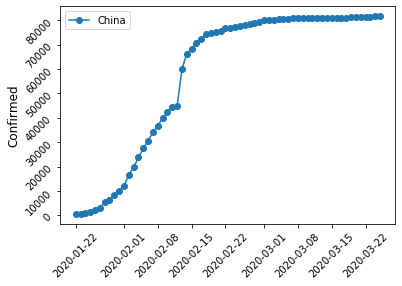

In [217]:
for country in countries_list:
    dates_count = df_dict[country].index.values
    plt.plot(dates_count, np.array(df_dict[country].Cases.values), '-o', label = country)
    plt.legend()
    plt.tick_params(rotation= 45)
    plt.ylabel(covid_id, fontsize = 12)

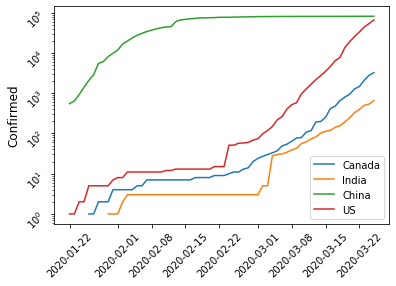

In [27]:
for country in countries_list:    
    dates_count = df_dict[country].index.values
    plt.semilogy(dates_count, np.array(df_dict[country].Cases.values), label = country)
    plt.legend()
    plt.tick_params(rotation= 45)
    plt.ylabel(covid_id, fontsize = 12)
    

In [28]:
# the models that I will be working on
# Logistic: https://en.wikipedia.org/wiki/Logistic_function
# gomperts = https://en.wikipedia.org/wiki/Gompertz_function
# exponential function


In [305]:
def mod_logistic(x,l,k,x_0):
    return l/(1+np.exp(-k*(x-x_0)))

def mod_gompertz(x,a,b,c):
    return(a*np.exp(-b*np.exp(-c*x))) 

def mod_expo(x,p,N0=3,X0=1):
    return N0*(1+p)**(x-X0)

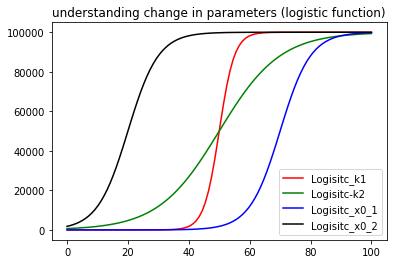

In [287]:
# leaning more about logistic function
# how to control parameters

tt= np.linspace(0,100,100)

plt.title('understanding change in parameters (logistic function)')
plt.plot(tt, mod_logistic(tt,100000,0.4,50), c='r', label='Logisitc_k1')
plt.plot(tt, mod_logistic(tt,100000,0.1,50), c='g', label='Logisitc-k2')
plt.plot(tt, mod_logistic(tt,100000,0.2,70), c='b', label='Logisitc_x0_1')
plt.plot(tt, mod_logistic(tt,100000,0.2,20), c='k', label='Logisitc_x0_2')
plt.legend()


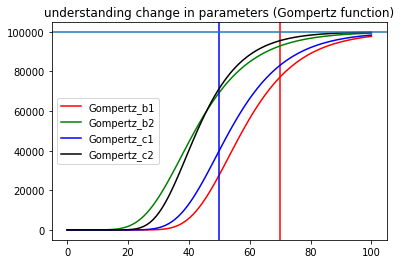

In [288]:
plt.title('understanding change in parameters (Gompertz function)')
plt.plot(tt, mod_gompertz(tt, 100000, 70, 0.08), c='r', label='Gompertz_b1')
plt.axvline(x=70, c='r')
plt.plot(tt, mod_gompertz(tt, 100000, 20, 0.08), c='g', label='Gompertz_b2')
plt.plot(tt, mod_gompertz(tt, 100000, 50, 0.08), c='b', label='Gompertz_c1')
plt.axvline(x=50, c='b')
plt.plot(tt, mod_gompertz(tt, 100000, 50, 0.1), c='k', label='Gompertz_c2')
plt.legend()

plt.axhline(y=100000)

(-1000, 150000)

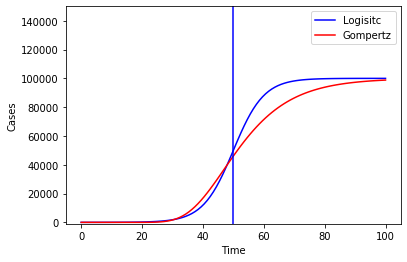

In [289]:
plt.plot(tt, mod_logistic(tt,100000,0.2,50), c='b', label='Logisitc')
plt.plot(tt, mod_gompertz(tt, 100000, 50, 1/12), c='r', label='Gompertz')
plt.legend()
plt.axvline(x=50, c='b')
plt.xlabel('Time')
plt.ylabel('Cases')
plt.ylim(-1000,150000)

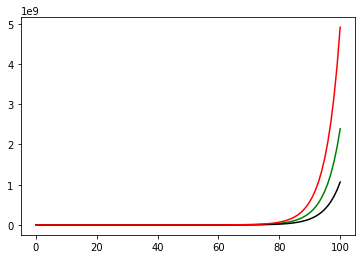

In [299]:
plt.plot(tt, expo_model(tt, 0.23), c='g', label='Exponential')
plt.plot(tt, expo_model(tt, 0.220), c='k', label='Exponential')
plt.plot(tt, expo_model(tt, 0.239), c='r', label='Exponential')

In [301]:
country = 'US'


c_pars = {}
# we are keeping the initial value out because of exponential model because im chosing 
# initian value to be 
x = np.array(list(df_dict[country]['DayCount'].values))[1:-1] 
y = np.array(list(df_dict[country]['Cases'].values))[1:-1] 
y0 = y[0]
yf = y[-1]

fit_i = curve_fit(mod_logistic,x,y,p0=[50000,0.33,50], maxfev=10000)#, bounds=([0,0,0],[10,100,150000]))
li,ki,x_0i = fit_i[0]
sigma_li, sigma_ki, sigma_x_0i = np.sqrt(np.diag(fit_i[1]))

c_pars[(country,'Logistic','l')] = li
c_pars[(country,'Logistic','k')] = ki
c_pars[(country,'Logistic','x_0')] = x_0i
c_pars[(country,'Logistic','sga')] = sigma_li
c_pars[(country,'Logistic','sgb')] = sigma_ki
c_pars[(country,'Logistic','sgc')] = sigma_x_0i

perc_flat = 0.98
sol = int(fsolve(lambda x : mod_logistic(x,li,ki,x_0i) - perc_flat*int(x_0i), ki))

c_pars[(country,'Logistic','c_time')] = sol #int(x_0i)

y_pred = mod_logistic(x,li,ki,x_0i)
MSLE=sklm.mean_squared_log_error(y,y_pred)

datesol = datetime.strftime(df_dict[country].index[0] + timedelta(days=sol), ' %d, %b %Y' )

C:\Users\sidha\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [302]:
'''print(df_dict[country].index[0])
print(datesol)
print(MSLE)
print(perc_flat*int(x_0i))
print(ki)
print(li,ki,x_0i)
print(lambda x : mod_logistic(x,li,ki,x_0i) - perc_flat*int(x_0i))

print(sol)'''

'print(df_dict[country].index[0])\nprint(datesol)\nprint(MSLE)\nprint(perc_flat*int(x_0i))\nprint(ki)\nprint(li,ki,x_0i)\nprint(lambda x : mod_logistic(x,li,ki,x_0i) - perc_flat*int(x_0i))\n\nprint(sol)'

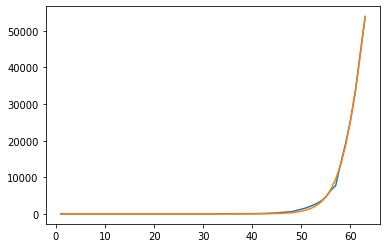

In [284]:
plt.plot(x,y)
dd = fit_i[0]
plt.plot(x, mod_logistic(x,dd[0],dd[1],dd[2]))

In [285]:
c_pars

{('US', 'Logistic', 'l'): 115146.44784663341,
 ('US', 'Logistic', 'k'): 0.3803999173525372,
 ('US', 'Logistic', 'x_0'): 63.32776503040986,
 ('US', 'Logistic', 'sga'): 6374.469044214252,
 ('US', 'Logistic', 'sgb'): 0.00793181699146835,
 ('US', 'Logistic', 'sgc'): 0.26526740697865214,
 ('US', 'Logistic', 'c_time'): 38}

In [275]:
# gompertx function

ini_guess = [1,10,x_0i]  ##take initial guess from result of Logistic model
fit_i = curve_fit(mod_gompertz,x,y,p0=ini_guess)#, max_nfev=100000, bounds=([0,0,0],[1000,1000,10000000]))    
ai,bi,ci = fit_i[0]
sigma_ai, sigma_bi, sigma_ci = np.sqrt(np.diag(fit_i[1]))

perc_flat = 0.95   ##smaller percentage, since Gompertz flattens out very slowly
sol = int(fsolve(lambda x : mod_gompertz(x,ai,bi,ci) - perc_flat*int(ci), 1000, maxfev=10000))


c_pars[(country,'Gompertz','a')] = ai
c_pars[(country,'Gompertz','b')] = bi
c_pars[(country,'Gompertz','c')] = ci
c_pars[(country,'Gompertz','sga')] = sigma_ai
c_pars[(country,'Gompertz','sgb')] = sigma_bi
c_pars[(country,'Gompertz','sgc')] = sigma_ci
c_pars[(country,'Gompertz','c_time')] = int(ci)

C:\Users\sidha\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\sidha\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [276]:
perc_flat = 0.95   ##smaller percentage, since Gompertz flattens out very slowly
sol = int(fsolve(lambda x : mod_gompertz(x,ai,bi,ci) - perc_flat*int(ci), 1000, maxfev=10000))
print(sol)
print(c_pars)

1000
{('India', 'Logistic', 'l'): 56825448.92176741, ('India', 'Logistic', 'k'): 0.18377503872852188, ('India', 'Logistic', 'x_0'): 117.7749633040024, ('India', 'Logistic', 'sga'): 743959750603.4485, ('India', 'Logistic', 'sgb'): 0.012010032602414948, ('India', 'Logistic', 'sgc'): 71374.29597203985, ('India', 'Logistic', 'c_time'): 46, ('India', 'Gompertz', 'a'): 61.96363636376937, ('India', 'Gompertz', 'b'): 10.0, ('India', 'Gompertz', 'c'): 117.7749633040024, ('India', 'Gompertz', 'sga'): inf, ('India', 'Gompertz', 'sgb'): inf, ('India', 'Gompertz', 'sgc'): inf, ('India', 'Gompertz', 'c_time'): 117}


In [279]:
y_pred = mod_gompertz(x,ai,bi,ci)
MSLE=sklm.mean_squared_log_error(y,y_pred)

In [306]:
"""
fit_i = curve_fit(mod_gompertz,x,y,p0=ini_guess)#, max_nfev=100000, bounds=([0,0,0],[1000,1000,10000000]))    
ai,bi,ci = fit_i[0]
sigma_ai, sigma_bi, sigma_ci = np.sqrt(np.diag(fit_i[1]))
"""

c_pars[(country,'Exponential','y0')] = y0
fit_exp = curve_fit((lambda tt,pp: mod_expo(tt,pp,N0=y0)),x,y,p0=[0.10])  ##Take N0 from initial number of reported cases
pi, sigma_pi = fit_exp[0][0], np.sqrt(fit_exp[1]).flatten()[0]


In [313]:
print(fit_exp)
print(np.sqrt(fit_exp[1]).flatten()[0])
print(np.sqrt(fit_exp[1]))

(array([0.18871061]), array([[4.34386837e-07]]))
0.0006590802961124993
[[0.00065908]]


In [311]:
mod_expo(x,pi)

array([3.56613184e+00, 4.23909877e+00, 5.03906170e+00, 5.98998612e+00,
       7.12036008e+00, 8.46404760e+00, 1.00613032e+01, 1.19599779e+01,
       1.42169527e+01, 1.68998426e+01, 2.00890222e+01, 2.38800339e+01,
       2.83864498e+01, 3.37432741e+01, 4.01109881e+01, 4.76803573e+01,
       5.66781467e+01, 6.73739146e+01, 8.00880873e+01, 9.52015594e+01,
       1.13167104e+02, 1.34522938e+02, 1.59908844e+02, 1.90085340e+02,
       2.25956461e+02, 2.68596843e+02, 3.19283919e+02, 3.79536183e+02,
       4.51158689e+02, 5.36297122e+02, 6.37502081e+02, 7.57805489e+02,
       9.00811428e+02, 1.07080411e+03, 1.27287621e+03, 1.51308146e+03,
       1.79861598e+03, 2.13803391e+03, 2.54150360e+03, 3.02111231e+03,
       3.59122826e+03, 4.26893115e+03, 5.07452377e+03, 6.03214026e+03,
       7.17046915e+03, 8.52361279e+03, 1.01321090e+04, 1.20441455e+04,
       1.43170036e+04, 1.70187741e+04, 2.02303974e+04, 2.40480881e+04,
       2.85862176e+04, 3.39807402e+04, 4.03932666e+04, 4.80159047e+04,
      

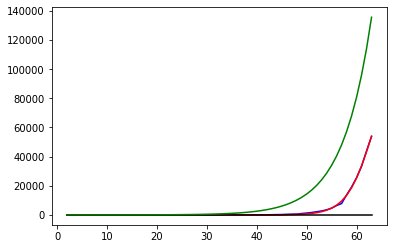

In [309]:
plt.plot(x,y, 'b')
plt.plot(x, mod_logistic(x,dd[0],dd[1],dd[2]), 'r')
plt.plot(x, mod_gompertz(x,ai,bi,ci), 'k')
plt.plot(x, mod_expo(x,pi),'g')

In [190]:
color_list = plt.cm.Set1( np.linspace(0.,1.0, 9 ) )
color_iter = iter(color_list)
#fig=plt.figure(1, figsize=(12,10), dpi=100,facecolor='w')
fig=plt.figure(figsize=(12,10))

<Figure size 864x720 with 0 Axes>

In [181]:
print(c_pars)

{('China', 'Logistic', 'l'): 81021.46738635615, ('China', 'Logistic', 'k'): 0.22152367592983885, ('China', 'Logistic', 'x_0'): 18.772953187491492, ('China', 'Logistic', 'sga'): 392.0595432047187, ('China', 'Logistic', 'sgb'): 0.006337600542358859, ('China', 'Logistic', 'sgc'): 0.14880839341015992, ('China', 'Logistic', 'c_time'): 18, ('China', 'Gompertz', 'a'): 82171.7510350091, ('China', 'Gompertz', 'b'): 10.12092440167321, ('China', 'Gompertz', 'c'): 0.1466712076245049, ('China', 'Gompertz', 'sga'): 567.3058548307778, ('China', 'Gompertz', 'sgb'): 0.9414779129360872, ('China', 'Gompertz', 'sgc'): 0.0054872901462188475, ('China', 'Gompertz', 'c_time'): 0}


In [191]:
flatasymp = max([c_pars[('China',chosen_plotmodel,'c_time')] for country in countries_list])+3
print(flatasymp)

21


In [193]:
c_pars[('China',chosen_plotmodel,'c_time')]

18

In [131]:
chosen_plotmodel = 'Logistic'

axes = fig.subplots(2, sharex=True, sharey=False)
#for country in countries_list:
col=next(color_iter)
ax = axes[0]
x = np.array(list(df_dict[country]['DayCount'].values))
y = np.array(list(df_dict[country]['Cases'].values))
ax.scatter(df_dict[country].index ,y , label=country,color=col)# Predicted logistic curve

a,b,c = (c_pars[(country,chosen_plotmodel,par)] for par in ['a','b','c'])
sigma_a,sigma_b,sigma_c = (c_pars[(country,chosen_plotmodel,par)] for par in ['sga','sgb','sgc'])
mean = [reg_model(i,a,b,c) for i in pred_x]
ax.plot(pred_date, mean , label=chosen_plotmodel+" model", color=col)  #Predicted Logistic Curve
fig.show()

C:\Users\sidha\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


In [134]:
chosen_plotmodel = 'Logistic'
flatasymp = max([c_pars[(country,chosen_plotmodel,'c_time')] for country in countries_list])+3

KeyError: ('Canada', 'Logistic', 'c_time')

In [244]:
def frm(flo):
    return '{:d}'.format(int(round(flo)))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56])

In [249]:
# for prediction
reg_model = mod_logistic
chosenmodel = 'Gompertz'

leaveout = -1
x = np.array(list(df_dict[country]['DayCount'].values))
print("Used data, Day Count: ", x[-1+leaveout])

y = np.array(list(df_dict[country]['Cases'].values))
print("Used data, Number of cases: "+covid_id+" in the last day: ", y[-1+leaveout])
day = x[-1]

realdat = y[-1]
a,b,c = (c_pars[(country,chosenmodel,par)] for par in ['a','b','c'])
sigma_a,sigma_b,sigma_c = (c_pars[(country,chosenmodel,par)] for par in ['sga','sgb','sgc'])


prediction = reg_model(day,a,b,c)
pluspred = np.abs(reg_model(day,np.abs(a+sigma_a),np.abs(b+sigma_b),np.abs(c+sigma_c)))
minuspred = np.abs(reg_model(day,np.abs(a-sigma_a),np.abs(b-sigma_b),np.abs(c-sigma_c)))

print(prediction)
print("Prediction from "+chosenmodel+" Model : ", frm(prediction), ' ( +'+frm(pluspred-prediction)+', -'+frm(prediction-minuspred)+')')

chosenmodel = 'Logistic'
a,b,c = (c_pars[(country,chosenmodel,par)] for par in ["l","k","x_0"])
sigma_a,sigma_b,sigma_c = (c_pars[(country,chosenmodel,par)] for par in ['sga','sgb','sgc'])


prediction = reg_model(day,a,b,c)
pluspred = np.abs(reg_model(day,np.abs(a+sigma_a),np.abs(b+sigma_b),np.abs(c+sigma_c)))
minuspred = np.abs(reg_model(day,np.abs(a-sigma_a),np.abs(b-sigma_b),np.abs(c-sigma_c)))

print(prediction)
print("Prediction from "+chosenmodel+" Model : ", frm(prediction), ' ( +'+frm(pluspred-prediction)+', -'+frm(prediction-minuspred)+')')


Used data, Day Count:  63
Used data, Number of cases: Confirmed in the last day:  81591
82171.7510350091
Prediction from Gompertz Model :  82172  ( +567, -567)
81017.85790816683
Prediction from Logistic Model :  81018  ( +393, -393)


KeyError: ('India', 'Gompertz', 'a')

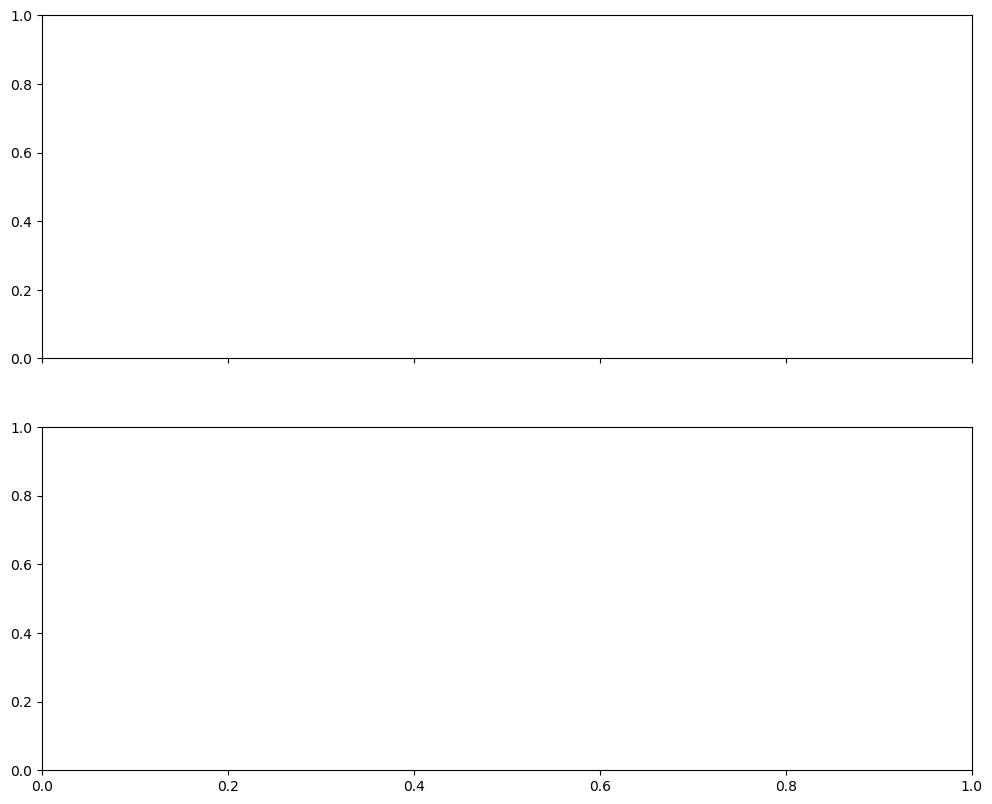

In [266]:
# for plotting
country = 'India'
fig=plt.figure(1, figsize=(12,10), dpi=100,facecolor='w')
axes = fig.subplots(2, sharex=True, sharey=False)

ax = axes[0]

x = np.array(list(df_dict[country]['DayCount'].values))
y = np.array(list(df_dict[country]['Cases'].values))

a,b,c = (c_pars[(country,chosen_plotmodel,par)] for par in ['a','b','c'])
sigma_a,sigma_b,sigma_c = (c_pars[(country,chosen_plotmodel,par)] for par in ['sga','sgb','sgc'])


ax.scatter(df_dict[country].index ,y ,label=country,color=col)# Predicted logistic curve

flatasymp = max([c_pars[(country,chosen_plotmodel,'c_time')] for country in countries_list])+3
mindate = min([df_dict[country].index[0] for country in countries_list])
maxdate = mindate + np.timedelta64(flatasymp,'D')
pred_x = np.arange(np.min(x),flatasymp+np.min(x))
pred_date = pd.date_range(start=df_dict[country].index[0], periods=flatasymp).values


mean = [reg_model(i,a,b,c) for i in pred_x]
ax.plot(pred_date, mean , label=chosen_plotmodel+" model", color=col)  #Predicted Logistic Curve
upper_lim = [reg_model(i,a+0,b+0,c+sigma_c) for i in pred_x]
lower_lim = [reg_model(i,a-0,b-0,c-sigma_c) for i in pred_x]
ax.fill_between(pred_date, upper_lim, lower_lim, color=col, alpha=0.4)

#ax.plot(pred_date, mean, label=chosen_plotmodel+" model", color=col)

In [254]:
flatasymp = max([c_pars[(country,chosen_plotmodel,'c_time')] for country in countries_list])+3
print(flatasymp)
pred_x = np.arange(np.min(x),flatasymp+np.min(x))

3


In [258]:
print(pred_x)

[1 2 3]


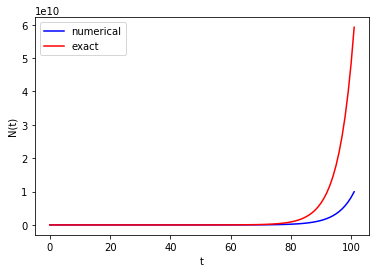

In [317]:
'''N_0 = input('Give initial population size N_0: ')
r   = input('Give net growth rate r: ')
dt  = input('Give time step size: ')
N_t = input('Give number of steps: ')'''

N_0 = 100
r   = 0.2
dt  = 1
N_t = 100
from numpy import linspace, zeros
t = linspace(0, (N_t+1)*dt, N_t+2)
N = zeros(N_t+2)

N[0] = N_0
for n in range(N_t+1):
    N[n+1] = N[n] + r*dt*N[n]

import matplotlib.pyplot as plt
numerical_sol = 'bo' if N_t < 70 else 'b-'
plt.plot(t, N, numerical_sol, t, N_0*np.exp(r*t), 'r-')
plt.legend(['numerical', 'exact'], loc='upper left')
plt.xlabel('t'); plt.ylabel('N(t)')
filestem = 'growth1_%dsteps' % N_t
#plt.savefig('%s.png' % filestem); plt.savefig('%s.pdf' % filestem)